# Time Series Forecasting with ARIMAX, SARIMAX and PROPHET
## by Vesna Pop-Dimitrijoska
---

WebTrafic dataset: **ALL DEVICES**

---

# Task

Time Series Forecasting with ARIMA, SARIMA and PROPHET the Web Traffic dataset for each device type (separately) and forecast the total cumulaive traffic. 

---
## Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import itertools
from summarytools import dfSummary
import matplotlib.pyplot as plt
import seaborn as sns

#Time-series Forecasting
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.model_selection import ParameterGrid

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

## Read the Dataset

In [2]:
df_org = pd.read_csv('df_total_final.csv',index_col=0, parse_dates=['Date'])
df = df_org.copy()

## Train-test split

In [3]:
# Train-test split 
train_total = df.loc[df.index <  pd.Timestamp('2018-04-01')]
test_total  = df.loc[df.index >= pd.Timestamp('2018-04-01')]

In [4]:
train = train_total.shape[0]
test = test_total.shape[0]
print('print(train):', train_total.shape)
print('print(test):', test_total.shape)
print(f'\ntrain / test -> {round(train/(train + test)*100,2)}% / {round(test/(train + test)*100,2)}%')

print(train): (1551, 1)
print(test): (184, 1)

train / test -> 89.39% / 10.61%


In [5]:
# Generate all different combinations of p, q and q triplets

p = range(0, 15)
d = range(0, 4)
q = range(0, 4)

pdq = list(itertools.product(p, d, q))

---
## Time Series Forecasting with ARIMA

In [6]:
best_mape = float('inf')
best_order = None

for order in pdq:
    p, d, q = order
    model_ARIMA = ARIMA(train_total['Sessions'],
                  exog=None,
                  order=(p, d, q),
                  seasonal_order=(0, 0, 0, 0), 
                  trend=None, 
                  enforce_stationarity=True, 
                  freq='1D')

    
    results = model_ARIMA.fit()
    results = results.forecast(steps=len(test_total))
    
    mape = mean_absolute_percentage_error(test_total['Sessions'], results)
    print(f'(p, d, q) order: {order}, with MAPE = {round(mape*100, 2)}%')

    if mape < best_mape:
        best_mape = mape
        best_order = order
        
print('-------------------------------------------------')
print('Best model:')
print(f'(p, d, q) -> {best_order} with MAPE = {round(best_mape*100, 2)}%')


(p, d, q) order: (0, 0, 0), with MAPE = 2.34%
(p, d, q) order: (0, 0, 1), with MAPE = 2.32%
(p, d, q) order: (0, 0, 2), with MAPE = 2.32%
(p, d, q) order: (0, 0, 3), with MAPE = 2.33%
(p, d, q) order: (0, 1, 0), with MAPE = 3.04%
(p, d, q) order: (0, 1, 1), with MAPE = 3.88%
(p, d, q) order: (0, 1, 2), with MAPE = 1.88%
(p, d, q) order: (0, 1, 3), with MAPE = 1.88%
(p, d, q) order: (0, 2, 0), with MAPE = 400.7%
(p, d, q) order: (0, 2, 1), with MAPE = 3.06%
(p, d, q) order: (0, 2, 2), with MAPE = 3.92%
(p, d, q) order: (0, 2, 3), with MAPE = 1.87%
(p, d, q) order: (0, 3, 0), with MAPE = 25464.13%
(p, d, q) order: (0, 3, 1), with MAPE = 433.27%
(p, d, q) order: (0, 3, 2), with MAPE = 9.44%
(p, d, q) order: (0, 3, 3), with MAPE = 61.09%
(p, d, q) order: (1, 0, 0), with MAPE = 2.34%
(p, d, q) order: (1, 0, 1), with MAPE = 2.32%
(p, d, q) order: (1, 0, 2), with MAPE = 2.32%
(p, d, q) order: (1, 0, 3), with MAPE = 2.33%
(p, d, q) order: (1, 1, 0), with MAPE = 3.26%
(p, d, q) order: (1, 1, 1)

(p, d, q) order: (11, 0, 1), with MAPE = 2.1%
(p, d, q) order: (11, 0, 2), with MAPE = 2.09%
(p, d, q) order: (11, 0, 3), with MAPE = 2.06%
(p, d, q) order: (11, 1, 0), with MAPE = 1.18%
(p, d, q) order: (11, 1, 1), with MAPE = 1.15%
(p, d, q) order: (11, 1, 2), with MAPE = 1.26%
(p, d, q) order: (11, 1, 3), with MAPE = 1.18%
(p, d, q) order: (11, 2, 0), with MAPE = 2.12%
(p, d, q) order: (11, 2, 1), with MAPE = 1.46%
(p, d, q) order: (11, 2, 2), with MAPE = 0.96%
(p, d, q) order: (11, 2, 3), with MAPE = 0.98%
(p, d, q) order: (11, 3, 0), with MAPE = 23.03%
(p, d, q) order: (11, 3, 1), with MAPE = 3.53%
(p, d, q) order: (11, 3, 2), with MAPE = 1.74%
(p, d, q) order: (11, 3, 3), with MAPE = 6.79%
(p, d, q) order: (12, 0, 0), with MAPE = 2.08%
(p, d, q) order: (12, 0, 1), with MAPE = 2.08%
(p, d, q) order: (12, 0, 2), with MAPE = 2.08%
(p, d, q) order: (12, 0, 3), with MAPE = 2.14%
(p, d, q) order: (12, 1, 0), with MAPE = 1.16%
(p, d, q) order: (12, 1, 1), with MAPE = 1.19%
(p, d, q) ord

In [7]:
model_ARIMA = ARIMA(train_total['Sessions'],
              exog=None,
              order = (best_order[0], best_order[1], best_order[2]),
              seasonal_order=(0, 0, 0, 0), 
              trend=None, 
              enforce_stationarity=True, 
              freq='1D')

results = model_ARIMA.fit()
print(results.summary())

results = results.forecast(steps = len(test_total))

                               SARIMAX Results                                
Dep. Variable:               Sessions   No. Observations:                 1551
Model:                 ARIMA(7, 2, 2)   Log Likelihood                 618.872
Date:                Sat, 21 Oct 2023   AIC                          -1217.743
Time:                        18:54:34   BIC                          -1164.290
Sample:                    01-01-2014   HQIC                         -1197.862
                         - 03-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0173      0.073     -0.238      0.812      -0.160       0.125
ar.L2         -0.0390      0.072     -0.544      0.587      -0.180       0.102
ar.L3         -0.0142      0.074     -0.192      0.8

In [8]:
y_test = test_total['Sessions']
y_pred = results

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Preformance metrics for ARIMA model:')
print('--------------------------------------')
print('MAE:   ', round(mae, 2))
print('RMSE:  ', round(rmse, 2))
print('R2:    ', round(r2*100, 2))
print('MAPE:  ', round(mape*100, 2), '%')

Preformance metrics for ARIMA model:
--------------------------------------
MAE:    0.1
RMSE:   0.14
R2:     84.39
MAPE:   0.7 %


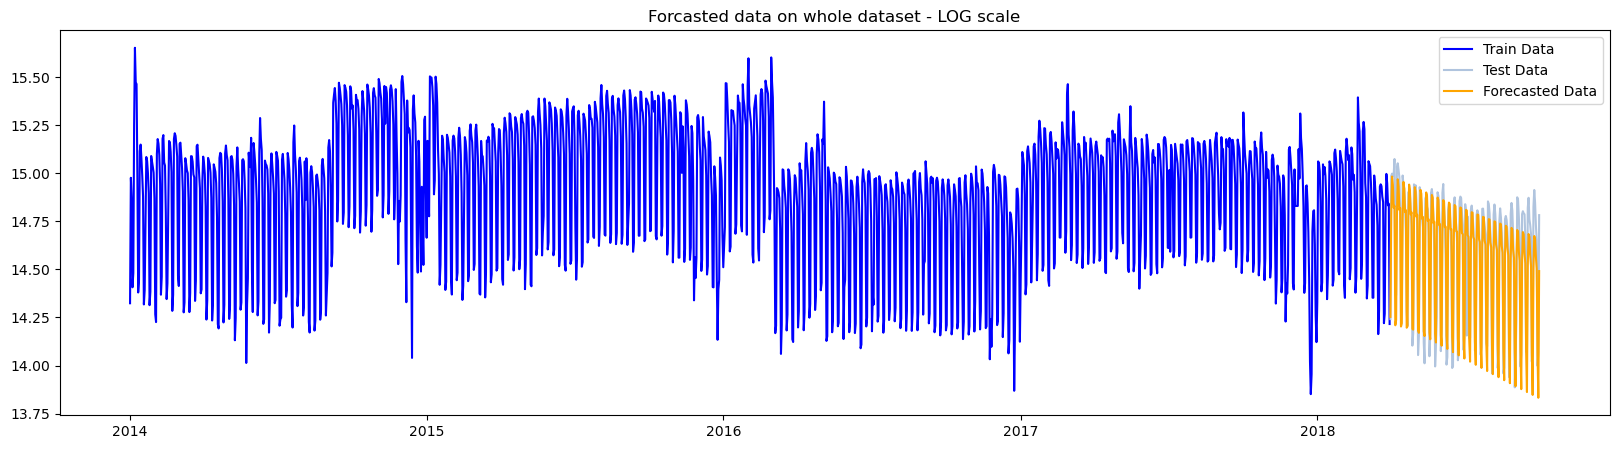

In [9]:
# Forcasted data in LOG scale

Train = train_total['Sessions']
Test = test_total['Sessions']
Forecast = results

plt.figure(figsize=[20,5])
plt.plot(Train, color='blue', label='Train Data')
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on whole dataset - LOG scale')
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on test dataset - LOG scale')
plt.legend()
plt.show()

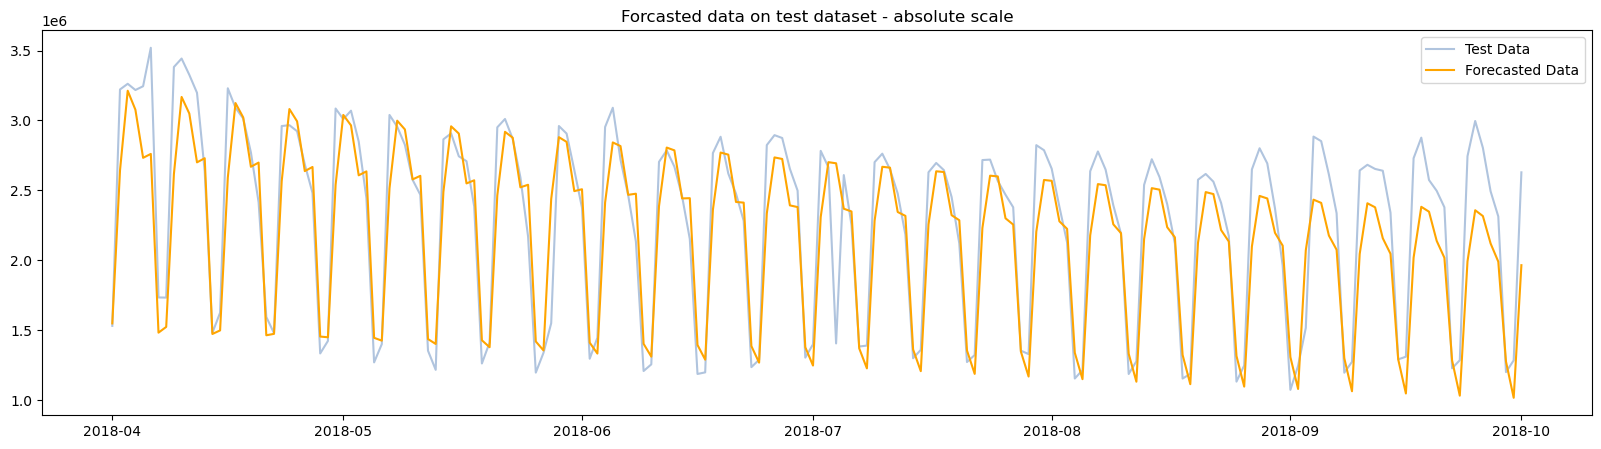

In [10]:
# Forcasted data in absolute scale

Train = np.exp(train_total['Sessions'])
Test = np.exp(test_total['Sessions'])
Forecast = np.exp(results)

plt.figure(figsize=[20,5])
plt.plot(Train, color='blue', label='Train Data')
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on whole dataset - absolute scale')
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on test dataset - absolute scale')
plt.legend()
plt.show()

#
---
## Time Series Forecasting with SARIMA

In [11]:
best_mape = float('inf')
best_order = None

for order in pdq:
    p, d, q = order

    model_SARIMA = SARIMAX(train_total['Sessions'], 
                    exog=None,
                    order=(p, d, q),
                    seasonal_order=(0, 0, 0, 7),
                    trend=None,
                    enforce_stationarity=True,
                    enforce_invertibility=False, 
                    freq='1D')
    
    results = model_SARIMA.fit()
    results = results.forecast(steps=len(test_total))
   
    mape = mean_absolute_percentage_error(test_total['Sessions'], results)
    print(f'(p, d, q) order: {order}, with MAPE = {round(mape*100, 2)}%')

    if mape < best_mape:
        best_mape = mape
        best_order = order
        
print('-------------------------------------------------')
print('Best model:')
print(f'(p, d, q) -> {best_order} with MAPE = {round(best_mape*100, 2)}%')


(p, d, q) order: (0, 0, 0), with MAPE = 100.0%
(p, d, q) order: (0, 0, 1), with MAPE = 99.74%
(p, d, q) order: (0, 0, 2), with MAPE = 99.49%
(p, d, q) order: (0, 0, 3), with MAPE = 99.29%
(p, d, q) order: (0, 1, 0), with MAPE = 3.04%
(p, d, q) order: (0, 1, 1), with MAPE = 3.88%
(p, d, q) order: (0, 1, 2), with MAPE = 1.88%
(p, d, q) order: (0, 1, 3), with MAPE = 1.88%
(p, d, q) order: (0, 2, 0), with MAPE = 400.7%
(p, d, q) order: (0, 2, 1), with MAPE = 3.06%
(p, d, q) order: (0, 2, 2), with MAPE = 3.92%
(p, d, q) order: (0, 2, 3), with MAPE = 1.87%
(p, d, q) order: (0, 3, 0), with MAPE = 25464.13%
(p, d, q) order: (0, 3, 1), with MAPE = 433.27%
(p, d, q) order: (0, 3, 2), with MAPE = 111.88%
(p, d, q) order: (0, 3, 3), with MAPE = 8.41%
(p, d, q) order: (1, 0, 0), with MAPE = 4.86%
(p, d, q) order: (1, 0, 1), with MAPE = 7.02%
(p, d, q) order: (1, 0, 2), with MAPE = 1.87%
(p, d, q) order: (1, 0, 3), with MAPE = 1.88%
(p, d, q) order: (1, 1, 0), with MAPE = 3.26%
(p, d, q) order: (1, 

(p, d, q) order: (11, 0, 1), with MAPE = 1.2%
(p, d, q) order: (11, 0, 2), with MAPE = 1.19%
(p, d, q) order: (11, 0, 3), with MAPE = 1.04%
(p, d, q) order: (11, 1, 0), with MAPE = 1.18%
(p, d, q) order: (11, 1, 1), with MAPE = 1.13%
(p, d, q) order: (11, 1, 2), with MAPE = 1.24%
(p, d, q) order: (11, 1, 3), with MAPE = 1.16%
(p, d, q) order: (11, 2, 0), with MAPE = 2.12%
(p, d, q) order: (11, 2, 1), with MAPE = 1.18%
(p, d, q) order: (11, 2, 2), with MAPE = 1.26%
(p, d, q) order: (11, 2, 3), with MAPE = 1.11%
(p, d, q) order: (11, 3, 0), with MAPE = 23.03%
(p, d, q) order: (11, 3, 1), with MAPE = 56.39%
(p, d, q) order: (11, 3, 2), with MAPE = 5.62%
(p, d, q) order: (11, 3, 3), with MAPE = 2.08%
(p, d, q) order: (12, 0, 0), with MAPE = 1.15%
(p, d, q) order: (12, 0, 1), with MAPE = 1.17%
(p, d, q) order: (12, 0, 2), with MAPE = 1.0%
(p, d, q) order: (12, 0, 3), with MAPE = 1.01%
(p, d, q) order: (12, 1, 0), with MAPE = 1.16%
(p, d, q) order: (12, 1, 1), with MAPE = 1.19%
(p, d, q) ord

In [12]:
model_SARIMA = SARIMAX(train_total['Sessions'], 
                exog=None,
                order=(best_order[0], best_order[1], best_order[2]),
                seasonal_order=(0, 0, 0, 7),
                trend=None,
                enforce_stationarity=True,
                enforce_invertibility=False, 
                freq='1D')

results = model_SARIMA.fit()
print(results.summary())

results = results.forecast(steps = len(test_total))

                               SARIMAX Results                                
Dep. Variable:               Sessions   No. Observations:                 1551
Model:              SARIMAX(13, 2, 0)   Log Likelihood                 833.598
Date:                Sat, 21 Oct 2023   AIC                          -1639.195
Time:                        19:27:41   BIC                          -1564.360
Sample:                    01-01-2014   HQIC                         -1611.361
                         - 03-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2862      0.016    -82.133      0.000      -1.317      -1.256
ar.L2         -1.5042      0.026    -57.834      0.000      -1.555      -1.453
ar.L3         -1.6379      0.038    -42.582      0.0

In [13]:
y_test = test_total['Sessions']
y_pred = results

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Preformance metrics for SARIMA model:')
print('--------------------------------------')
print('MAE:   ', round(mae, 2))
print('RMSE:  ', round(rmse, 2))
print('R2:    ', round(r2*100, 2))
print('MAPE:  ', round(mape*100, 2), '%')

Preformance metrics for SARIMA model:
--------------------------------------
MAE:    0.14
RMSE:   0.17
R2:     73.83
MAPE:   0.96 %


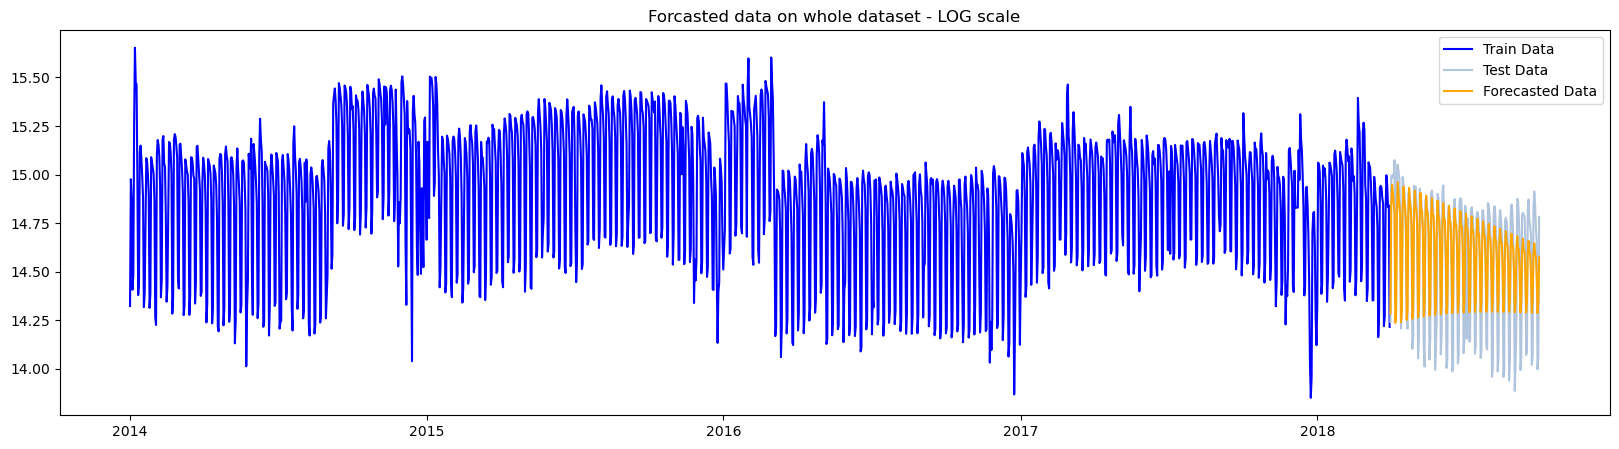

In [14]:
# Forcasted data in LOG scale

Train = train_total['Sessions']
Test = test_total['Sessions']
Forecast = results

plt.figure(figsize=[20,5])
plt.plot(Train, color='blue', label='Train Data')
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on whole dataset - LOG scale')
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on test dataset - LOG scale')
plt.legend()
plt.show()

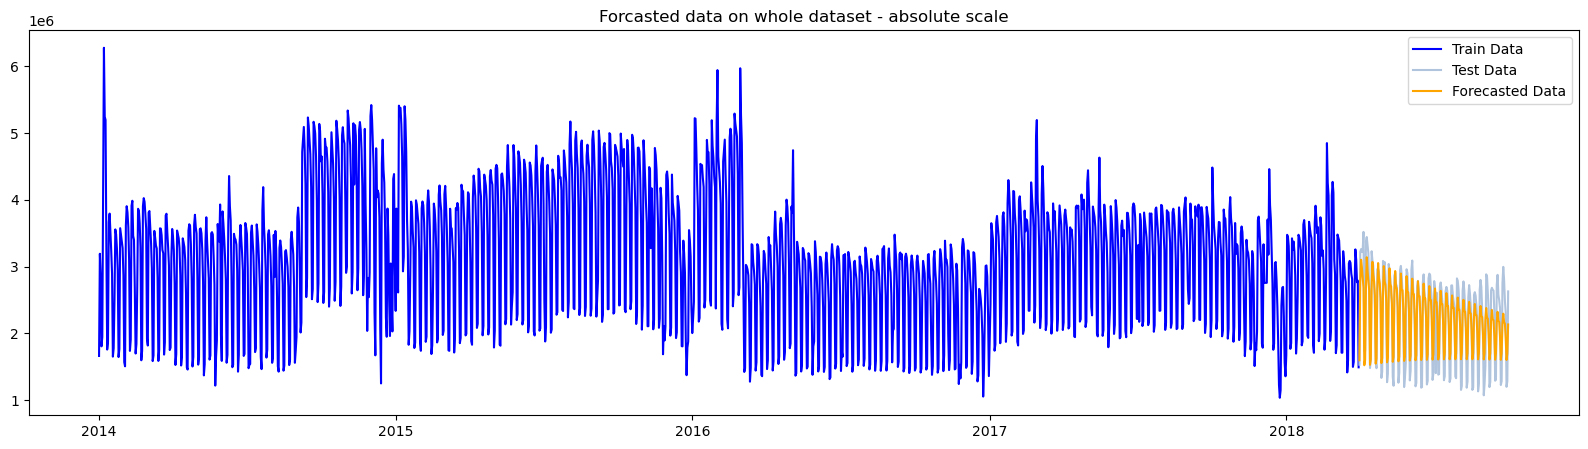

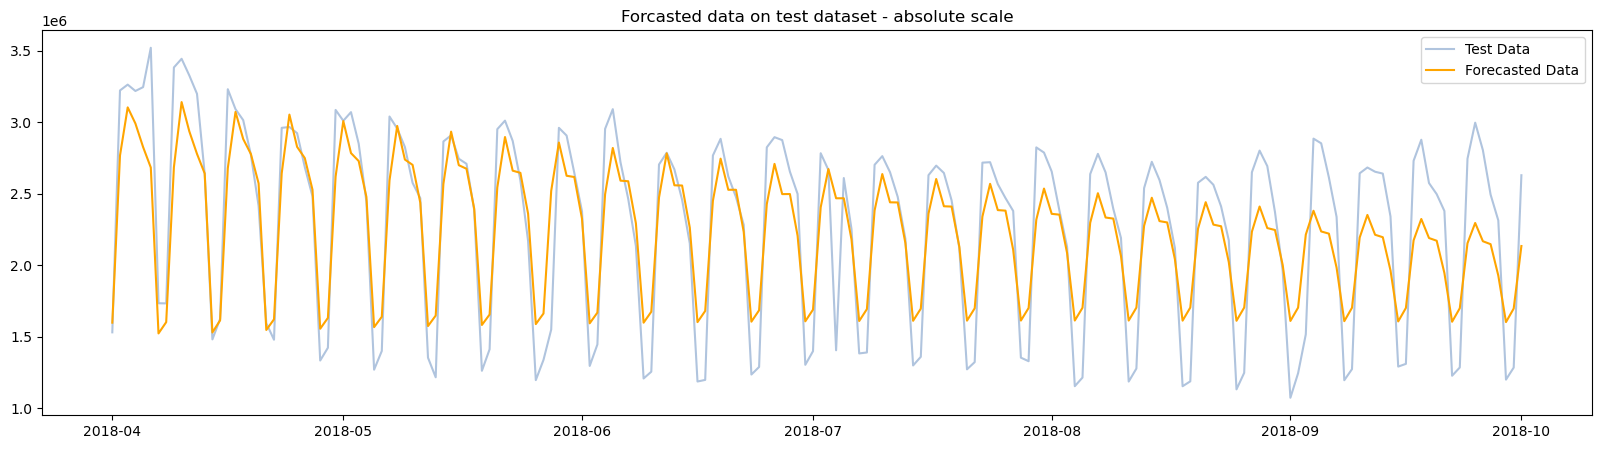

In [15]:
# Forcasted data in absolute scale

Train = np.exp(train_total['Sessions'])
Test = np.exp(test_total['Sessions'])
Forecast = np.exp(results)

plt.figure(figsize=[20,5])
plt.plot(Train, color='blue', label='Train Data')
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on whole dataset - absolute scale')
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on test dataset - absolute scale')
plt.legend()
plt.show()

#
---
## Time Series Forecasting with PROPHET

In [16]:
df_org = pd.read_csv('df_total_final.csv', parse_dates=['Date'])
df = df_org.copy()

In [17]:
df.rename(columns={'Date': 'ds', 'Sessions': 'y'}, inplace=True)

In [18]:
# Train-test split 
train_total = df.loc[df['ds'] <  pd.Timestamp('2018-04-01')]
test_total  = df.loc[df['ds'] >= pd.Timestamp('2018-04-01')]

In [19]:
parameters = {
    'n_changepoints': [5, 6, 7], 
    'changepoint_range': np.arange(0.85, 0.9, 0.001)}

parameter_grid = ParameterGrid(parameters)

best_mape = float('inf')
best_parameters = None

for param_set in parameter_grid:
    n_changepoints = param_set['n_changepoints']
    changepoint_range = param_set['changepoint_range']
    
    model = prophet.Prophet(
        growth='linear',
        changepoints=None,
        n_changepoints=n_changepoints,
        changepoint_range=changepoint_range,
        yearly_seasonality='auto',
        weekly_seasonality='auto',
        daily_seasonality='auto',
        holidays=None
    )
    
    model.fit(train_total)
    
    future = model.make_future_dataframe(periods=test_total.shape[0], freq='D')
    results = model.predict(future)
    
    mape = mean_absolute_percentage_error(test_total['y'], results['yhat'][-len(test_total['y']):])
    
    print(f'MAPE = {round(mape*100, 2)}% - n_changepoints = {n_changepoints}, changepoint_range = {changepoint_range}')
    
    if mape < best_mape:
        best_mape = mape
        best_parameters = param_set

print(f'Best parameters: {best_parameters}, MAPE = {round(best_mape*100, 2)}%')


19:27:44 - cmdstanpy - INFO - Chain [1] start processing
19:27:44 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.95% - n_changepoints = 5, changepoint_range = 0.85


19:27:45 - cmdstanpy - INFO - Chain [1] start processing
19:27:45 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.65% - n_changepoints = 6, changepoint_range = 0.85


19:27:47 - cmdstanpy - INFO - Chain [1] start processing
19:27:47 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.77% - n_changepoints = 7, changepoint_range = 0.85


19:27:48 - cmdstanpy - INFO - Chain [1] start processing
19:27:48 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.94% - n_changepoints = 5, changepoint_range = 0.851


19:27:49 - cmdstanpy - INFO - Chain [1] start processing
19:27:49 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.64% - n_changepoints = 6, changepoint_range = 0.851


19:27:51 - cmdstanpy - INFO - Chain [1] start processing
19:27:51 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.75% - n_changepoints = 7, changepoint_range = 0.851


19:27:52 - cmdstanpy - INFO - Chain [1] start processing
19:27:52 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.96% - n_changepoints = 5, changepoint_range = 0.852


19:27:53 - cmdstanpy - INFO - Chain [1] start processing
19:27:53 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.63% - n_changepoints = 6, changepoint_range = 0.852


19:27:55 - cmdstanpy - INFO - Chain [1] start processing
19:27:55 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.74% - n_changepoints = 7, changepoint_range = 0.852


19:27:56 - cmdstanpy - INFO - Chain [1] start processing
19:27:56 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.97% - n_changepoints = 5, changepoint_range = 0.853


19:27:57 - cmdstanpy - INFO - Chain [1] start processing
19:27:57 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.6% - n_changepoints = 6, changepoint_range = 0.853


19:27:58 - cmdstanpy - INFO - Chain [1] start processing
19:27:59 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.7% - n_changepoints = 7, changepoint_range = 0.853


19:28:00 - cmdstanpy - INFO - Chain [1] start processing
19:28:00 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.97% - n_changepoints = 5, changepoint_range = 0.854


19:28:01 - cmdstanpy - INFO - Chain [1] start processing
19:28:01 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.61% - n_changepoints = 6, changepoint_range = 0.854


19:28:02 - cmdstanpy - INFO - Chain [1] start processing
19:28:03 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.7% - n_changepoints = 7, changepoint_range = 0.854


19:28:04 - cmdstanpy - INFO - Chain [1] start processing
19:28:04 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.99% - n_changepoints = 5, changepoint_range = 0.855


19:28:05 - cmdstanpy - INFO - Chain [1] start processing
19:28:05 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.6% - n_changepoints = 6, changepoint_range = 0.855


19:28:06 - cmdstanpy - INFO - Chain [1] start processing
19:28:06 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.66% - n_changepoints = 7, changepoint_range = 0.855


19:28:08 - cmdstanpy - INFO - Chain [1] start processing
19:28:08 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.0% - n_changepoints = 5, changepoint_range = 0.856


19:28:09 - cmdstanpy - INFO - Chain [1] start processing
19:28:09 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.59% - n_changepoints = 6, changepoint_range = 0.856


19:28:10 - cmdstanpy - INFO - Chain [1] start processing
19:28:10 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.65% - n_changepoints = 7, changepoint_range = 0.856


19:28:11 - cmdstanpy - INFO - Chain [1] start processing
19:28:12 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.99% - n_changepoints = 5, changepoint_range = 0.857


19:28:13 - cmdstanpy - INFO - Chain [1] start processing
19:28:13 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.58% - n_changepoints = 6, changepoint_range = 0.857


19:28:14 - cmdstanpy - INFO - Chain [1] start processing
19:28:14 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.75% - n_changepoints = 7, changepoint_range = 0.857


19:28:16 - cmdstanpy - INFO - Chain [1] start processing
19:28:16 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.01% - n_changepoints = 5, changepoint_range = 0.858


19:28:17 - cmdstanpy - INFO - Chain [1] start processing
19:28:17 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.57% - n_changepoints = 6, changepoint_range = 0.858


19:28:18 - cmdstanpy - INFO - Chain [1] start processing
19:28:18 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.83% - n_changepoints = 7, changepoint_range = 0.858


19:28:20 - cmdstanpy - INFO - Chain [1] start processing
19:28:20 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.01% - n_changepoints = 5, changepoint_range = 0.859


19:28:21 - cmdstanpy - INFO - Chain [1] start processing
19:28:21 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.55% - n_changepoints = 6, changepoint_range = 0.859


19:28:22 - cmdstanpy - INFO - Chain [1] start processing
19:28:22 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.77% - n_changepoints = 7, changepoint_range = 0.859


19:28:24 - cmdstanpy - INFO - Chain [1] start processing
19:28:24 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.01% - n_changepoints = 5, changepoint_range = 0.86


19:28:25 - cmdstanpy - INFO - Chain [1] start processing
19:28:25 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.55% - n_changepoints = 6, changepoint_range = 0.86


19:28:26 - cmdstanpy - INFO - Chain [1] start processing
19:28:27 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.91% - n_changepoints = 7, changepoint_range = 0.86


19:28:28 - cmdstanpy - INFO - Chain [1] start processing
19:28:28 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.01% - n_changepoints = 5, changepoint_range = 0.861


19:28:29 - cmdstanpy - INFO - Chain [1] start processing
19:28:29 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.54% - n_changepoints = 6, changepoint_range = 0.861


19:28:30 - cmdstanpy - INFO - Chain [1] start processing
19:28:30 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.0% - n_changepoints = 7, changepoint_range = 0.861


19:28:32 - cmdstanpy - INFO - Chain [1] start processing
19:28:32 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.01% - n_changepoints = 5, changepoint_range = 0.862


19:28:33 - cmdstanpy - INFO - Chain [1] start processing
19:28:33 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.53% - n_changepoints = 6, changepoint_range = 0.862


19:28:34 - cmdstanpy - INFO - Chain [1] start processing
19:28:34 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.07% - n_changepoints = 7, changepoint_range = 0.862


19:28:35 - cmdstanpy - INFO - Chain [1] start processing
19:28:36 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.03% - n_changepoints = 5, changepoint_range = 0.863


19:28:37 - cmdstanpy - INFO - Chain [1] start processing
19:28:37 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.52% - n_changepoints = 6, changepoint_range = 0.863


19:28:38 - cmdstanpy - INFO - Chain [1] start processing
19:28:38 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.97% - n_changepoints = 7, changepoint_range = 0.863


19:28:39 - cmdstanpy - INFO - Chain [1] start processing
19:28:40 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.03% - n_changepoints = 5, changepoint_range = 0.864


19:28:41 - cmdstanpy - INFO - Chain [1] start processing
19:28:41 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.5% - n_changepoints = 6, changepoint_range = 0.864


19:28:42 - cmdstanpy - INFO - Chain [1] start processing
19:28:42 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.05% - n_changepoints = 7, changepoint_range = 0.864


19:28:43 - cmdstanpy - INFO - Chain [1] start processing
19:28:43 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.04% - n_changepoints = 5, changepoint_range = 0.865


19:28:45 - cmdstanpy - INFO - Chain [1] start processing
19:28:45 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.5% - n_changepoints = 6, changepoint_range = 0.865


19:28:46 - cmdstanpy - INFO - Chain [1] start processing
19:28:46 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.09% - n_changepoints = 7, changepoint_range = 0.865


19:28:47 - cmdstanpy - INFO - Chain [1] start processing
19:28:48 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.04% - n_changepoints = 5, changepoint_range = 0.866


19:28:49 - cmdstanpy - INFO - Chain [1] start processing
19:28:49 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.49% - n_changepoints = 6, changepoint_range = 0.866


19:28:50 - cmdstanpy - INFO - Chain [1] start processing
19:28:50 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.11% - n_changepoints = 7, changepoint_range = 0.866


19:28:51 - cmdstanpy - INFO - Chain [1] start processing
19:28:52 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.03% - n_changepoints = 5, changepoint_range = 0.867


19:28:53 - cmdstanpy - INFO - Chain [1] start processing
19:28:53 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.5% - n_changepoints = 6, changepoint_range = 0.867


19:28:54 - cmdstanpy - INFO - Chain [1] start processing
19:28:54 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.11% - n_changepoints = 7, changepoint_range = 0.867


19:28:55 - cmdstanpy - INFO - Chain [1] start processing
19:28:55 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.04% - n_changepoints = 5, changepoint_range = 0.868


19:28:57 - cmdstanpy - INFO - Chain [1] start processing
19:28:57 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.5% - n_changepoints = 6, changepoint_range = 0.868


19:28:58 - cmdstanpy - INFO - Chain [1] start processing
19:28:58 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.14% - n_changepoints = 7, changepoint_range = 0.868


19:28:59 - cmdstanpy - INFO - Chain [1] start processing
19:28:59 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.02% - n_changepoints = 5, changepoint_range = 0.869


19:29:01 - cmdstanpy - INFO - Chain [1] start processing
19:29:01 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.49% - n_changepoints = 6, changepoint_range = 0.869


19:29:02 - cmdstanpy - INFO - Chain [1] start processing
19:29:02 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.26% - n_changepoints = 7, changepoint_range = 0.869


19:29:03 - cmdstanpy - INFO - Chain [1] start processing
19:29:04 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.04% - n_changepoints = 5, changepoint_range = 0.87


19:29:05 - cmdstanpy - INFO - Chain [1] start processing
19:29:05 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.48% - n_changepoints = 6, changepoint_range = 0.87


19:29:06 - cmdstanpy - INFO - Chain [1] start processing
19:29:06 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.3% - n_changepoints = 7, changepoint_range = 0.87


19:29:07 - cmdstanpy - INFO - Chain [1] start processing
19:29:07 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.03% - n_changepoints = 5, changepoint_range = 0.871


19:29:09 - cmdstanpy - INFO - Chain [1] start processing
19:29:09 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.47% - n_changepoints = 6, changepoint_range = 0.871


19:29:10 - cmdstanpy - INFO - Chain [1] start processing
19:29:10 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.31% - n_changepoints = 7, changepoint_range = 0.871


19:29:11 - cmdstanpy - INFO - Chain [1] start processing
19:29:11 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.03% - n_changepoints = 5, changepoint_range = 0.872


19:29:12 - cmdstanpy - INFO - Chain [1] start processing
19:29:13 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.46% - n_changepoints = 6, changepoint_range = 0.872


19:29:14 - cmdstanpy - INFO - Chain [1] start processing
19:29:14 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.15% - n_changepoints = 7, changepoint_range = 0.872


19:29:15 - cmdstanpy - INFO - Chain [1] start processing
19:29:15 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.03% - n_changepoints = 5, changepoint_range = 0.873


19:29:16 - cmdstanpy - INFO - Chain [1] start processing
19:29:16 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.46% - n_changepoints = 6, changepoint_range = 0.873


19:29:18 - cmdstanpy - INFO - Chain [1] start processing
19:29:18 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.23% - n_changepoints = 7, changepoint_range = 0.873


19:29:19 - cmdstanpy - INFO - Chain [1] start processing
19:29:20 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.01% - n_changepoints = 5, changepoint_range = 0.874


19:29:21 - cmdstanpy - INFO - Chain [1] start processing
19:29:22 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.45% - n_changepoints = 6, changepoint_range = 0.874


19:29:23 - cmdstanpy - INFO - Chain [1] start processing
19:29:24 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.23% - n_changepoints = 7, changepoint_range = 0.874


19:29:25 - cmdstanpy - INFO - Chain [1] start processing
19:29:25 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.03% - n_changepoints = 5, changepoint_range = 0.875


19:29:26 - cmdstanpy - INFO - Chain [1] start processing
19:29:26 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.45% - n_changepoints = 6, changepoint_range = 0.875


19:29:28 - cmdstanpy - INFO - Chain [1] start processing
19:29:28 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.33% - n_changepoints = 7, changepoint_range = 0.875


19:29:29 - cmdstanpy - INFO - Chain [1] start processing
19:29:29 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.01% - n_changepoints = 5, changepoint_range = 0.876


19:29:30 - cmdstanpy - INFO - Chain [1] start processing
19:29:30 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.45% - n_changepoints = 6, changepoint_range = 0.876


19:29:31 - cmdstanpy - INFO - Chain [1] start processing
19:29:32 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.2% - n_changepoints = 7, changepoint_range = 0.876


19:29:33 - cmdstanpy - INFO - Chain [1] start processing
19:29:33 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.01% - n_changepoints = 5, changepoint_range = 0.877


19:29:34 - cmdstanpy - INFO - Chain [1] start processing
19:29:34 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.44% - n_changepoints = 6, changepoint_range = 0.877


19:29:36 - cmdstanpy - INFO - Chain [1] start processing
19:29:36 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.29% - n_changepoints = 7, changepoint_range = 0.877


19:29:37 - cmdstanpy - INFO - Chain [1] start processing
19:29:37 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.01% - n_changepoints = 5, changepoint_range = 0.878


19:29:39 - cmdstanpy - INFO - Chain [1] start processing
19:29:39 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.44% - n_changepoints = 6, changepoint_range = 0.878


19:29:40 - cmdstanpy - INFO - Chain [1] start processing
19:29:40 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.15% - n_changepoints = 7, changepoint_range = 0.878


19:29:41 - cmdstanpy - INFO - Chain [1] start processing
19:29:42 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.0% - n_changepoints = 5, changepoint_range = 0.879


19:29:43 - cmdstanpy - INFO - Chain [1] start processing
19:29:43 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.45% - n_changepoints = 6, changepoint_range = 0.879


19:29:44 - cmdstanpy - INFO - Chain [1] start processing
19:29:45 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.28% - n_changepoints = 7, changepoint_range = 0.879


19:29:46 - cmdstanpy - INFO - Chain [1] start processing
19:29:46 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.0% - n_changepoints = 5, changepoint_range = 0.88


19:29:47 - cmdstanpy - INFO - Chain [1] start processing
19:29:47 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.45% - n_changepoints = 6, changepoint_range = 0.88


19:29:48 - cmdstanpy - INFO - Chain [1] start processing
19:29:48 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.18% - n_changepoints = 7, changepoint_range = 0.88


19:29:50 - cmdstanpy - INFO - Chain [1] start processing
19:29:50 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.98% - n_changepoints = 5, changepoint_range = 0.881


19:29:51 - cmdstanpy - INFO - Chain [1] start processing
19:29:51 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.46% - n_changepoints = 6, changepoint_range = 0.881


19:29:52 - cmdstanpy - INFO - Chain [1] start processing
19:29:52 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.21% - n_changepoints = 7, changepoint_range = 0.881


19:29:54 - cmdstanpy - INFO - Chain [1] start processing
19:29:54 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.0% - n_changepoints = 5, changepoint_range = 0.882


19:29:55 - cmdstanpy - INFO - Chain [1] start processing
19:29:55 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.46% - n_changepoints = 6, changepoint_range = 0.882


19:29:56 - cmdstanpy - INFO - Chain [1] start processing
19:29:57 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.2% - n_changepoints = 7, changepoint_range = 0.882


19:29:58 - cmdstanpy - INFO - Chain [1] start processing
19:29:58 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.97% - n_changepoints = 5, changepoint_range = 0.883


19:29:59 - cmdstanpy - INFO - Chain [1] start processing
19:29:59 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.48% - n_changepoints = 6, changepoint_range = 0.883


19:30:01 - cmdstanpy - INFO - Chain [1] start processing
19:30:01 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.18% - n_changepoints = 7, changepoint_range = 0.883


19:30:02 - cmdstanpy - INFO - Chain [1] start processing
19:30:02 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.96% - n_changepoints = 5, changepoint_range = 0.884


19:30:03 - cmdstanpy - INFO - Chain [1] start processing
19:30:03 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.5% - n_changepoints = 6, changepoint_range = 0.884


19:30:04 - cmdstanpy - INFO - Chain [1] start processing
19:30:05 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.22% - n_changepoints = 7, changepoint_range = 0.884


19:30:06 - cmdstanpy - INFO - Chain [1] start processing
19:30:06 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.95% - n_changepoints = 5, changepoint_range = 0.885


19:30:07 - cmdstanpy - INFO - Chain [1] start processing
19:30:07 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.51% - n_changepoints = 6, changepoint_range = 0.885


19:30:08 - cmdstanpy - INFO - Chain [1] start processing
19:30:09 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.16% - n_changepoints = 7, changepoint_range = 0.885


19:30:10 - cmdstanpy - INFO - Chain [1] start processing
19:30:10 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.94% - n_changepoints = 5, changepoint_range = 0.886


19:30:11 - cmdstanpy - INFO - Chain [1] start processing
19:30:11 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.53% - n_changepoints = 6, changepoint_range = 0.886


19:30:12 - cmdstanpy - INFO - Chain [1] start processing
19:30:12 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.16% - n_changepoints = 7, changepoint_range = 0.886


19:30:14 - cmdstanpy - INFO - Chain [1] start processing
19:30:14 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.96% - n_changepoints = 5, changepoint_range = 0.887


19:30:15 - cmdstanpy - INFO - Chain [1] start processing
19:30:15 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.55% - n_changepoints = 6, changepoint_range = 0.887


19:30:16 - cmdstanpy - INFO - Chain [1] start processing
19:30:16 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.19% - n_changepoints = 7, changepoint_range = 0.887


19:30:17 - cmdstanpy - INFO - Chain [1] start processing
19:30:18 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.94% - n_changepoints = 5, changepoint_range = 0.888


19:30:19 - cmdstanpy - INFO - Chain [1] start processing
19:30:19 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.58% - n_changepoints = 6, changepoint_range = 0.888


19:30:20 - cmdstanpy - INFO - Chain [1] start processing
19:30:20 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.22% - n_changepoints = 7, changepoint_range = 0.888


19:30:22 - cmdstanpy - INFO - Chain [1] start processing
19:30:22 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.96% - n_changepoints = 5, changepoint_range = 0.889


19:30:23 - cmdstanpy - INFO - Chain [1] start processing
19:30:23 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.59% - n_changepoints = 6, changepoint_range = 0.889


19:30:24 - cmdstanpy - INFO - Chain [1] start processing
19:30:25 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.27% - n_changepoints = 7, changepoint_range = 0.889


19:30:26 - cmdstanpy - INFO - Chain [1] start processing
19:30:26 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.91% - n_changepoints = 5, changepoint_range = 0.89


19:30:27 - cmdstanpy - INFO - Chain [1] start processing
19:30:27 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.62% - n_changepoints = 6, changepoint_range = 0.89


19:30:28 - cmdstanpy - INFO - Chain [1] start processing
19:30:29 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.24% - n_changepoints = 7, changepoint_range = 0.89


19:30:30 - cmdstanpy - INFO - Chain [1] start processing
19:30:30 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.9% - n_changepoints = 5, changepoint_range = 0.891


19:30:31 - cmdstanpy - INFO - Chain [1] start processing
19:30:31 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.62% - n_changepoints = 6, changepoint_range = 0.891


19:30:32 - cmdstanpy - INFO - Chain [1] start processing
19:30:33 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.26% - n_changepoints = 7, changepoint_range = 0.891


19:30:34 - cmdstanpy - INFO - Chain [1] start processing
19:30:34 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.9% - n_changepoints = 5, changepoint_range = 0.892


19:30:35 - cmdstanpy - INFO - Chain [1] start processing
19:30:35 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.68% - n_changepoints = 6, changepoint_range = 0.892


19:30:37 - cmdstanpy - INFO - Chain [1] start processing
19:30:37 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.29% - n_changepoints = 7, changepoint_range = 0.892


19:30:38 - cmdstanpy - INFO - Chain [1] start processing
19:30:38 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.89% - n_changepoints = 5, changepoint_range = 0.893


19:30:39 - cmdstanpy - INFO - Chain [1] start processing
19:30:39 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.72% - n_changepoints = 6, changepoint_range = 0.893


19:30:41 - cmdstanpy - INFO - Chain [1] start processing
19:30:41 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.22% - n_changepoints = 7, changepoint_range = 0.893


19:30:42 - cmdstanpy - INFO - Chain [1] start processing
19:30:42 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.86% - n_changepoints = 5, changepoint_range = 0.894


19:30:43 - cmdstanpy - INFO - Chain [1] start processing
19:30:43 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.74% - n_changepoints = 6, changepoint_range = 0.894


19:30:45 - cmdstanpy - INFO - Chain [1] start processing
19:30:45 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.27% - n_changepoints = 7, changepoint_range = 0.894


19:30:46 - cmdstanpy - INFO - Chain [1] start processing
19:30:46 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.86% - n_changepoints = 5, changepoint_range = 0.895


19:30:47 - cmdstanpy - INFO - Chain [1] start processing
19:30:47 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.82% - n_changepoints = 6, changepoint_range = 0.895


19:30:48 - cmdstanpy - INFO - Chain [1] start processing
19:30:49 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.18% - n_changepoints = 7, changepoint_range = 0.895


19:30:50 - cmdstanpy - INFO - Chain [1] start processing
19:30:50 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.85% - n_changepoints = 5, changepoint_range = 0.896


19:30:51 - cmdstanpy - INFO - Chain [1] start processing
19:30:51 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.84% - n_changepoints = 6, changepoint_range = 0.896


19:30:52 - cmdstanpy - INFO - Chain [1] start processing
19:30:52 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.17% - n_changepoints = 7, changepoint_range = 0.896


19:30:54 - cmdstanpy - INFO - Chain [1] start processing
19:30:54 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.85% - n_changepoints = 5, changepoint_range = 0.897


19:30:55 - cmdstanpy - INFO - Chain [1] start processing
19:30:55 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.87% - n_changepoints = 6, changepoint_range = 0.897


19:30:56 - cmdstanpy - INFO - Chain [1] start processing
19:30:56 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.13% - n_changepoints = 7, changepoint_range = 0.897


19:30:57 - cmdstanpy - INFO - Chain [1] start processing
19:30:58 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.83% - n_changepoints = 5, changepoint_range = 0.898


19:30:59 - cmdstanpy - INFO - Chain [1] start processing
19:30:59 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.87% - n_changepoints = 6, changepoint_range = 0.898


19:31:00 - cmdstanpy - INFO - Chain [1] start processing
19:31:00 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.14% - n_changepoints = 7, changepoint_range = 0.898


19:31:01 - cmdstanpy - INFO - Chain [1] start processing
19:31:02 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.83% - n_changepoints = 5, changepoint_range = 0.899


19:31:03 - cmdstanpy - INFO - Chain [1] start processing
19:31:03 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.95% - n_changepoints = 6, changepoint_range = 0.899


19:31:04 - cmdstanpy - INFO - Chain [1] start processing
19:31:04 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.08% - n_changepoints = 7, changepoint_range = 0.899


19:31:05 - cmdstanpy - INFO - Chain [1] start processing
19:31:05 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.81% - n_changepoints = 5, changepoint_range = 0.9


19:31:07 - cmdstanpy - INFO - Chain [1] start processing
19:31:07 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.94% - n_changepoints = 6, changepoint_range = 0.9


19:31:08 - cmdstanpy - INFO - Chain [1] start processing
19:31:08 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.04% - n_changepoints = 7, changepoint_range = 0.9
Best parameters: {'changepoint_range': 0.878, 'n_changepoints': 6}, MAPE = 0.44%


In [20]:
model = prophet.Prophet(
    growth='linear',
    changepoints=None,
    n_changepoints=best_parameters['n_changepoints'],
    changepoint_range=best_parameters['changepoint_range'],
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None
)

model.fit(train_total)

future = model.make_future_dataframe(periods=test_total.shape[0], freq='D')
results = model.predict(future)

19:31:10 - cmdstanpy - INFO - Chain [1] start processing
19:31:10 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
y_test = test_total['y']
y_pred = results['yhat'][-len(y_test):]

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Preformance metrics for PROPHET model:')
print('--------------------------------------')
print('MAE:   ', round(mae, 2))
print('RMSE:  ', round(rmse, 2))  
print('R2:    ', round(r2*100, 2))
print('MAPE:  ', round(mape*100, 2), '%') 

Preformance metrics for PROPHET model:
--------------------------------------
MAE:    0.06
RMSE:   0.1
R2:     91.07
MAPE:   0.44 %


In [22]:
plt.figure(figsize=(20,8))
fig = model.plot(results)
plt.vlines(pd.Timestamp('2018-04-01'), 13, 15.5, color='tab:orange', label='Split line between Train and Test')
plt.legend()
plt.show()

<Figure size 2000x800 with 0 Axes>

In [23]:
fig = plot_components_plotly(model, results)
fig.update_layout(title='Trend, yearly seasonality and weekly seasonality')

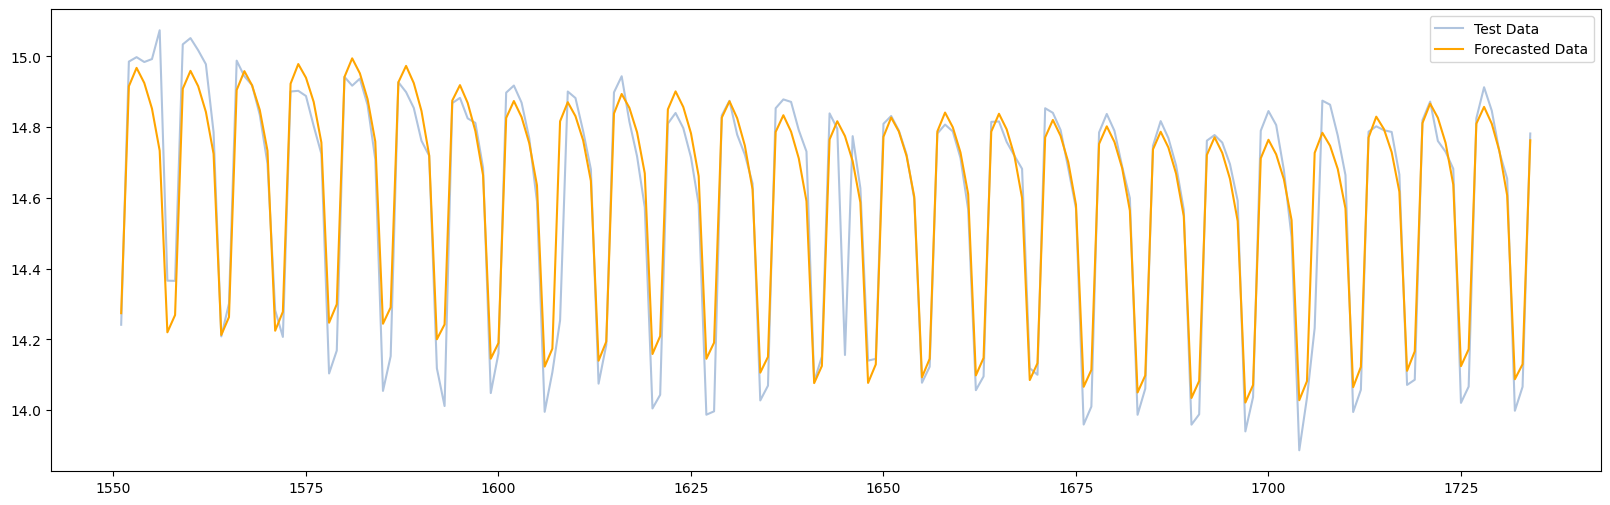

In [24]:
x_train = train_total['ds']
y_train = train_total['y']

x_test = test_total['ds']
y_test = test_total['y']

x_pred = df['ds'][-len(x_test):]
y_pred = results['yhat'][-len(y_test):]

plt.figure(figsize=(20,6))
plt.plot(x_train, y_train, color='blue', label='Train Data')
plt.plot(x_test, y_test, color='lightsteelblue', label='Test Data')
plt.plot(x_pred, y_pred, color='orange', label='Forecasted Data')
plt.legend()
plt.show()

plt.figure(figsize=(20,6))
plt.plot(y_test, color='lightsteelblue', label='Test Data')
plt.plot(y_pred, color='orange', label='Forecasted Data')
plt.legend()
plt.show()

---
# RESULTS:

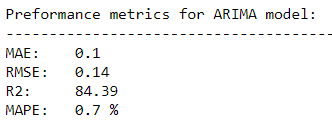
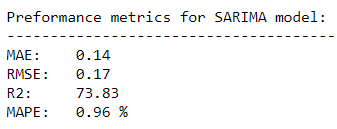



# CONCLUSION
All of the models demonstrated **EXCELLENT** forecasting performance on the test dataset, as evidenced by both visual representation of the predictions and the comprehensive evaluation metrics used.

Note: These metrics are calculated on the test split of the dataset. In a real forecasting model, such tests can only be done after the forecast period.

---